# OOP(Object-Oriented Programming)

## 객체 지향 프로그래밍

- 객체 : 실생활에서 일종의 물건, `속성` 과 `행동`을 가짐
- OOP `객체` -> `하나의 프로그램`으로 표현

- 클래스 : 객체의 설계도.
- 인스턴스(객체)  : 클래스(설계도)에 따라 실제 구현한 것


> OOP : 클래스와 객체의 개념을 가지고 세상에 있는 것들을 프로그래밍한 기법

## Class
- 선언 : `class` 클래스이름 (상속받는객체명):
- `속성(attribute)`과 `메소드(method)`를 가짐


### 속성(attribute)
- 속성 추가 : __init__, self
- `__init__` : 객체 초기화 예약함수. 속성을 추가할 때
- 클래스 밖에서도 `.`을 사용해서 값 변경 가능(권장X)

### 메소드(method)
- 클래스의 함수
- 메소드를 작성할 때 꼭 `self`를 매개변수로 넣어줘야 함

### Object(instance)
객체명 = 클래스명 (init함수의 interface에 따라 초기값 넣어줌)

### Tips

#### python naming rule

- snake_case : 띄어쓰기 -> `_` 사용, `변수, 함수`명 사용 
- CamelCase : 띄어쓰기-> `대문자`로, `Class`명에 사용

#### 파이썬 __ 의미

- `__` : 특수한 예약 함수나 변수, 함수명 변경(맨글링) 사용

#### 매직 매소드


#### self

- 생성된 `인스턴스(객체) 자신` 
클래스 코드 안에서는 self라고 불리고 밖에서는 자기이름으로 사용
- 클래스 자신의 요소에 접근하려면 꼭 self를 매개변수로 써줘야함

------

## OOP Example(노트북)
노트를 정리하는 프로그램
- Class : Notebook, Note

- content(str) 존재, 내용을 제거 가능
- 두 개 노트북 합칠 수도 있음
- Notebook에 Note 삽입 가능, 그 때 페이지를 생성(max=300)

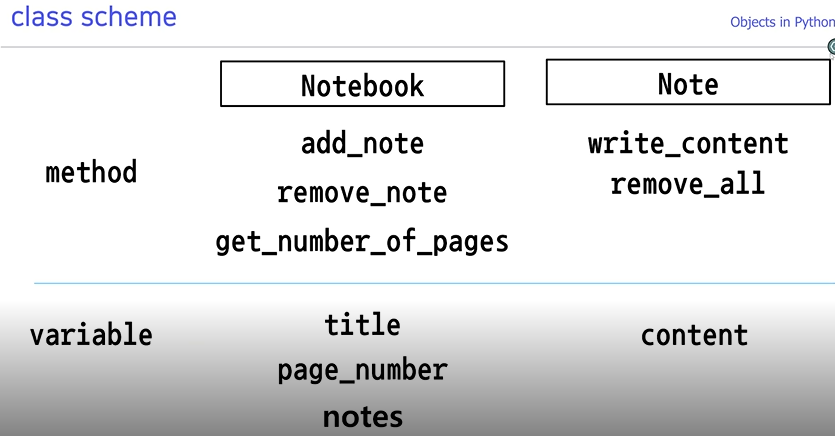

In [10]:
#Note Class

class Note(object):
    def __init__(self,content=None):#노트 생성. 처음 생성될 때는 빈 노트여야하니까(기본값 설정)
        self.content = content
        
    def write_content(self, content):#글쓰기
        self.content = content
        
    def remove_all(self):#내용 지우기
        self.content = ""
    
    def __add__(self, other):#두 콘텐츠의 내용을 합쳐 반환
        return self.content + other.content
    
    def __str__(self):#콘텐츠 출력
        return self.content


In [13]:
#Notebook Class

class Notebook(object):
    def __init__(self, title):
        self.title = title
        self.page_number = 1
        self.notes = {}#(노트가 저장될)페이지 : 노트. 페이지 번호로 노트에 접근
        
    def add_note(self, note, page = 0):#노트 추가 = page 추가
        if self.page_number < 300:
            if page == 0:#페이지 번호 지정x, 현재 노트의 마지막에 삽입
                self.notes[self.page_number] = note
                self.page_number +=1#페이지 추가
            else:#입력한 페이지에 노트 추가
                self.notes = {page : note}
                self.page_number += 1
        else:
            print("Page가 모두 채워졌습니다.")
        
    def remove_note(self,page_number):#노트 지우기
        if page_number in self.notes.keys():
            return self.note.pop(page_number)#해당 페이지의 노트 반환
        else:
            print("해당 page가 존재하지 않습니다.")
            
    def get_number_of_pages(self):#전체 노트페이지의 길이
        return len(self.notes.keys())

## OOP의 특징

- 실제 세상을 모델링 (`상속`, `다형성`,`히든 클래스`)<br>
Inheritance(상속) : `부모 클래스`로 부터 속성, 메소드를 물려받은 `자식 클래스`를 생성. 
<br>`super()`:부모 클래스의 것들을 사용 가능
<br><br>
Polymorphism(다형성) : 같은 이름 메소드를 (목적에 따라) 내부 로직은 다르게 작성<br>
함수명은 같은데 세부적인 구현은 다르게 할 수 있음
<br><br>
Visibility(가시성) : 누구나 객체 안에 모든 변수를 볼 필요X. 객체의 정보 접근 레벨을 조절<br>
`Encapsulation(캡슐화)` or `Information Hiding(정보은닉)`이라고 함<br>
클래스 설계 시, 클래스 간 간섭, 정보 공유를 최소화하면서 서로의 인터페이스만 알아도 사용하기 쉽도록 하게 만드는 것
  - private 변수 : `__변수명` 선언, 타객체(외부)가 접근X(맹글링)
  - @property : 객체 내부(private변수)에 접근 허용


- decotate<br>
`@` : decorator
 - first-class objects : 일급함수/객체. `파이썬의 함수=일급함수`<br>변수/데이터구조에 할당 가능,파라미터로도,리턴값으로도 가능
 - Inner function : 내재(내적)함수. 함수 속 함수 *꼭 기억!*
 - closures : 내재함수를 return값으로 반환 *JS에서 많이 씀*

In [14]:
def square(x):
    return x*x
def cube(x):
    return x*x*x


f = square #함수를 변수로 사용
f(5)

25

In [15]:
def formula(method, args_list):#method에 원하는 함수를 넣어서 사용하면 되니까 편함
    return [method(value) for value in args_list]

formula(cube, [1,3,5])

[1, 27, 125]

In [16]:
#Inner function : 내재(내적)함수. 함수 속 함수

def print_msg(msg):#2
    def printer():#4
        print(msg)#5
    printer()#3
    

print_msg("hello I'm Inner function")#1

hello I'm Inner function


In [ ]:
#Closures(클로저)-1

def print_msg(msg):
    def printer():
        print(msg)
    return printer()#리턴값 = (내재)함수
    

another = print_msg("hello I'm Inner function")
another()#another를 실행할 때마다 printer()가 실행




In [23]:
#Closures(클로저)

def star(func):
    def inner(*args, **kwargs):
        print(args[1]*30)
        func(*args, **kwargs)
        print(args[1]*30)
    return inner

#decorator func-1
@star
def printer(msg, mark):
    print(msg)
printer('Hello','#')


##############################
Hello
##############################


In [25]:
#decorator func-2
def star(func):
    def inner(*args, **kwargs):
        print("*"*30)
        func(*args, **kwargs)
        print("*"*30)
    return inner

def percent(func):
    def inner(*args, **kwargs):
        print("%"*30)
        func(*args, **kwargs)
        print("%"*30)
    return inner

#decorator func
@star
@percent
def printer(msg):
    print(msg)
printer('Hello')

******************************
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Hello
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
******************************


In [26]:
def generate_power(exponent):
    def wrapper(f):
        def inner(*args):
            result = f(*args)
            return exponent**result
        return inner
    return wrapper

@generate_power(2)
def raise_two(n):
    return n**2

In [27]:
print(raise_two(7))

562949953421312


### getter, setter, @property

추가 공부, 정리 예정